In [62]:
%matplotlib inline
from datetime import datetime
import time
import os
from pprint import pprint
import numpy as np
import gzip, cPickle
from glob import glob
import timeit
import sys
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA
import tensorflow as tf
sess = tf.InteractiveSession()

In [2]:
def dir_to_dataset(glob_files):
    for file_count, file_name in enumerate( sorted(glob(glob_files)) ):
        print(file_name)
        pklPartial=gzip.open(file_name)
        pklT= cPickle.load(pklPartial)
        if file_count==0:
            dataSet0=pklT[0]
            dataSet1=pklT[1]
        else:
            dataSet0 = np.concatenate((dataSet0,pklT[0]))
            dataSet1 = np.append(dataSet1,pklT[1])
        pklPartial.close()
        print len(dataSet0), len(dataSet1) 

    dataSet1=dataSet1-1
    #print np.amax(dataSet1)
    dataSet= (dataSet0, dataSet1)
    return dataSet

In [3]:
TrainSet = dir_to_dataset('data/*type1*')
ValidationSet = dir_to_dataset('data/*type2*')
TestSet = dir_to_dataset('data/*type3*')

data/mrna_20160125-200855_type1_00.pkl.gz
500 500
data/mrna_20160125-200855_type1_01.pkl.gz
1000 1000
data/mrna_20160125-200855_type1_02.pkl.gz
1500 1500
data/mrna_20160125-200855_type1_03.pkl.gz
2000 2000
data/mrna_20160125-200855_type1_04.pkl.gz
2500 2500
data/mrna_20160125-200855_type1_05.pkl.gz
3000 3000
data/mrna_20160125-200855_type1_06.pkl.gz
3500 3500
data/mrna_20160125-200855_type1_07.pkl.gz
4000 4000
data/mrna_20160125-200855_type1_08.pkl.gz
4500 4500
data/mrna_20160125-200855_type1_09.pkl.gz
5000 5000
data/mrna_20160125-200855_type1_10.pkl.gz
5500 5500
data/mrna_20160125-200855_type1_11.pkl.gz
6000 6000
data/mrna_20160125-200855_type1_12.pkl.gz
6500 6500
data/mrna_20160125-200855_type1_13.pkl.gz
7000 7000
data/mrna_20160125-200855_type1_14.pkl.gz
7500 7500
data/mrna_20160125-200855_type1_15.pkl.gz
7945 7945
data/mrna_20160125-200855_type2_00.pkl.gz
500 500
data/mrna_20160125-200855_type2_01.pkl.gz
1000 1000
data/mrna_20160125-200855_type2_02.pkl.gz
1500 1500
data/mrna_201601

In [4]:
tX, tY = TrainSet

## 바이오 데이터의 특징

1. sparsity
1. scaling
1. Random error(?)

1을 더하여(sparsity) 로그 변환(scaling) 후 차별 발현 유전자만 선정(Random error). 

In [5]:
npx=tX+1
lognpx=np.log(npx)

{'boxes': [<matplotlib.lines.Line2D at 0x7fbdf7f5a410>],
 'caps': [<matplotlib.lines.Line2D at 0x7fbdf7eae310>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fbdf7f90850>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fbdf7eaef90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fbdf7f5a5d0>,
  <matplotlib.lines.Line2D at 0x7fbdf7f5ac90>]}

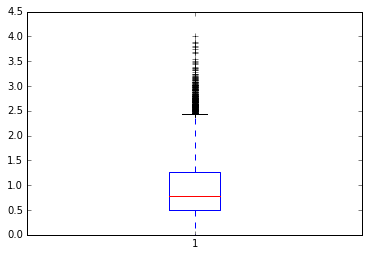

In [6]:
b=lognpx.std(axis=0)
plt.boxplot(b)

In [100]:
npxf=lognpx[:,lognpx.std(axis=0)>2.5]
print npxf.shape

(7945, 311)


In [18]:
# label 변수의 one-hot encoding
import pandas as pd
print(pd.get_dummies(tY).values)
tY_onehot=pd.get_dummies(tY).values
print tY_onehot.shape

[[ 0.  0.  0. ...,  1.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  1. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  1.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  1.]]
(7945, 34)


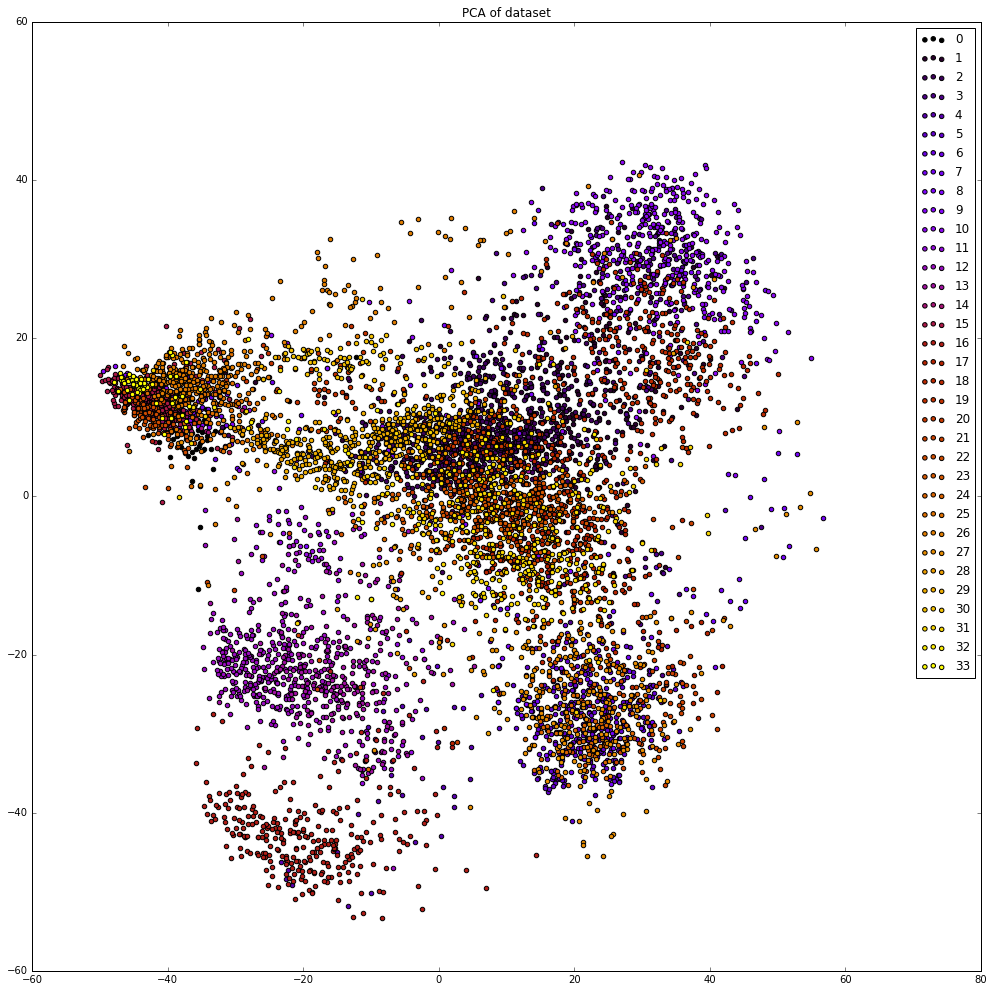

In [26]:
pca=PCA(n_components=2)
pX= pca.fit(npxf).transform(npxf)
number = 34
cmap = plt.get_cmap('gnuplot')
colors = [cmap(i) for i in np.linspace(0, 1, number)]
plt.figure(figsize=(17,17))
for i, c in enumerate(colors):
    plt.scatter(pX[tY == i, 0], pX[tY == i, 1], c=c, label=i)
plt.title('PCA of dataset')
plt.legend()
plt.show()

In [110]:
print(pca.explained_variance_ratio_)

[ 0.24291507  0.14858245]


In [101]:
## test set 준비
testX, testY = ValidationSet
logTestX=np.log(testX+1)
testXf=logTestX[:,lognpx.std(axis=0)>2.5]
print testXf.shape
print testXf[1:5,1:5]

(1679, 311)
[[ 8.88933513  9.2886026   7.50904684  6.69588433]
 [ 5.54750014  1.10942034  0.92600341  8.19787101]
 [ 3.78556142  0.          0.          2.97555508]
 [ 9.36615056  3.07926427  1.31622055  3.56175322]]


In [35]:
# label 변수의 one-hot encoding
# import pandas as pd
print(pd.get_dummies(testY).values)
testY_onehot=pd.get_dummies(testY).values
print testY_onehot.shape

[[ 0.  0.  1. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  1. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
(1679, 34)


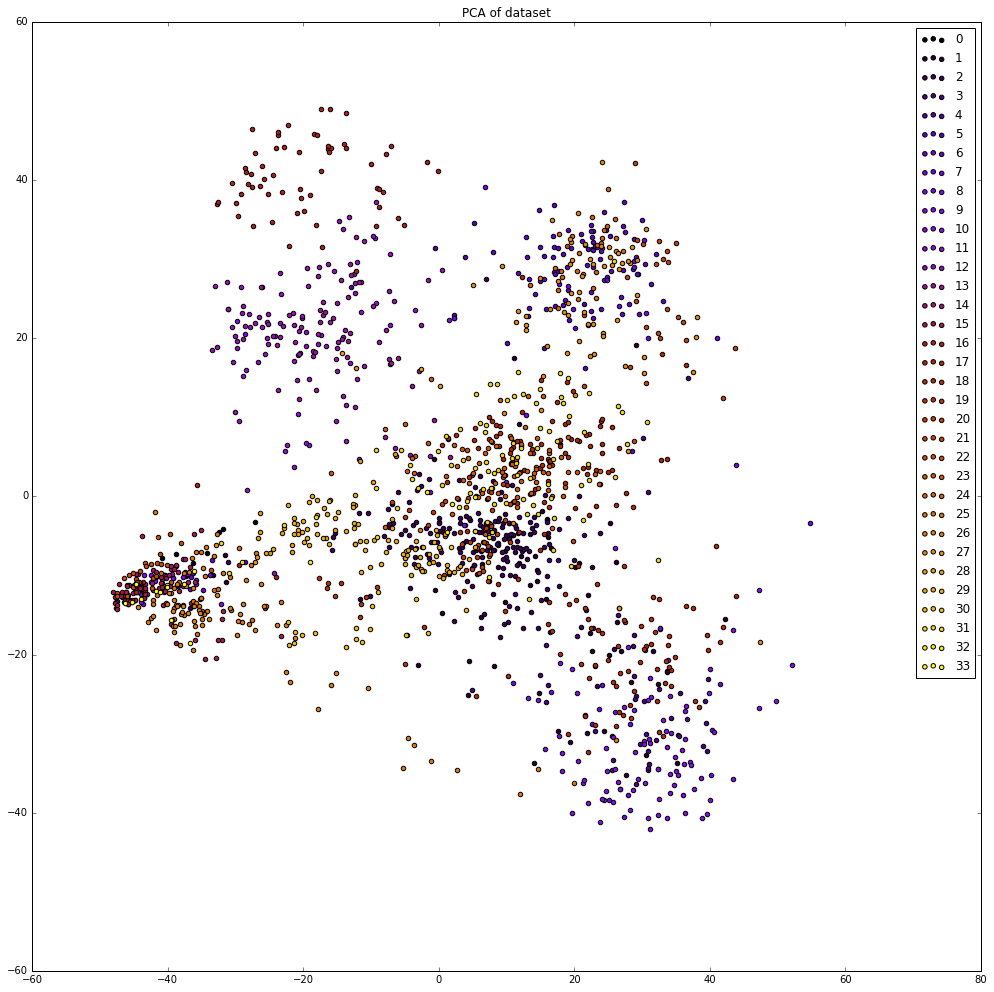

In [106]:
pca=PCA(n_components=2)
pX= pca.fit(testXf).transform(testXf)
number = 34
cmap = plt.get_cmap('gnuplot')
colors = [cmap(i) for i in np.linspace(0, 1, number)]
plt.figure(figsize=(17,17))
for i, c in enumerate(colors):
    plt.scatter(pX[testY == i, 0], pX[testY == i, 1], c=c, label=i)
plt.title('PCA of dataset')
plt.legend()
plt.show()

In [102]:
n_input = 311 # feature의 개수(gene expression)
n_classes = 34 # label의 개수(암의 종류(0-33))

x = tf.placeholder(tf.float32, [None, n_input])
y = tf.placeholder(tf.float32, [None, n_classes])

W = tf.Variable(tf.zeros([n_input, n_classes]))
bias = tf.Variable(tf.zeros([n_classes]))

pred = tf.nn.softmax(tf.matmul(x, W) + bias)

In [103]:
# 비용함수 정의
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y * tf.log(pred), reduction_indices=[1]))
#cross_entropy = -tf.reduce_sum(y * tf.log(pred))

# 학습률(learning rate) 정의
learning_rate= 0.01

# optimizer 정의
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cross_entropy)

In [104]:
# 모든 변수 초기화
init = tf.initialize_all_variables()
#print n_input
#print tY_onehot.shape
# Session 시작
# 모델 훈련
# test set로 모델 평가 : 정확도(accuracy) 측정
#with tf.Session() as sess:
sess.run(init)
for step in xrange(10001):
        # print step
    sess.run(optimizer, feed_dict={x:npxf, y:tY_onehot})
    if step%200==0:
        print step, sess.run(cross_entropy, feed_dict={x:npxf, y:tY_onehot})
    
print "                 "
print "optimization 완료!"
print "                 "
print "모형의 평가 결과는?...."

    # 모형의 Test
correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    
    # accuracy 계산
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print accuracy.eval({x: testXf, y: testY_onehot})
#print sess.run(accuracy,feed_dict={x: npxf, y: tY_onehot})

0 3.14643
200 0.312403
400 0.240912
600 0.20626
800 0.184576
1000 0.168749
1200 0.15642
1400 0.146406
1600 0.138033
1800 0.130878
2000 0.124664
2200 0.119193
2400 0.114324
2600 0.109952
2800 0.105995
3000 0.102391
3200 0.0990882
3400 0.0960477
3600 0.0932362
3800 0.0906266
4000 0.0881961
4200 0.0859257
4400 0.0837991
4600 0.0818024
4800 0.0799233
5000 0.0781512
5200 0.076477
5400 0.0748924
5600 0.0733899
5800 0.0719632
6000 0.0706064
6200 0.0693142
6400 0.0680819
6600 0.0669052
6800 0.0657803
7000 0.0647035
7200 0.0636718
7400 0.0626821
7600 0.0617319
7800 0.0608186
8000 0.05994
8200 0.0590939
8400 0.0582787
8600 0.0574923
8800 0.0567334
9000 0.0560003
9200 0.0552916
9400 0.0546061
9600 0.0539426
9800 0.0533
10000 0.0526772
                 
optimization 완료!
                 
모형의 평가 결과는?....
0.930316


In [50]:
testY.shape

(1679,)